# Machines & Language: An Introduction to Natural Language Processing [NLP]

Welcome! In this workshop, we are going to learn how to go through the process of performing some _Machine Learning_ tasks on a set of text data. To do so we will (1) **Download** a corpus of text data to work with (2) **Extract Features** from this data, (3) **Use an Algorithm to Train a Classifier** which will then classify previously unseen data into a set of predefined categories (_Supervised ML_), then (4) **Attempt a Topic Model** using LDA (_UNsupervised ML_).

#### "Machine learning is a research field that sits at the intersections of statistics, artificial intelligence, and computer science. It is also known as predictive analystics or statistical learning."
-- Andreas Mueller, "Introduction to Machine Learning with Python".

## Learning objectives

In this part of the workshop, you will begin to understand the following skills:

* Understanding the logic in broad-ish strokes behind some ML tasks
* Getting your eye familiar with some **Python** syntax
* Using techniques from the **Natural Language Toolkit (NLTK)** for a classification task
* Building a text classification system that can predict whether sentences belong to one category or another
* Using the **scikit-learn** package (in Python) to perform some ML task(s) on the data
* Evaluating the results of machine learning algorithms

## Key terms

**Machine Learning**: An application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed

**Corpus**: A large collection of data. In our case, this will be text data (although a corpus can contain any type of data)

**Dataset**: collection of related information (such as a corpus)

**Variable**: attribute of the dataset (such as the type of text being analyzed)

**Features**: Properties that describe data attributes for machine learning - often the variables

**Feature representation, feature vector**: A set of features

**Supervised Machine Learning**: A machine learning task of learning a function that maps an input to an output based on example input-output pairs

**Unsupervised Machine Learning**: A machine learning task used to draw inferences from datasets consisting of input data without labeled responses (lacks input-output pairs; only has input data)

**Algorithm**: A process or set of rules to be followed in calculations (or other problem-solving operations), particularly by a computer

**Classification**: An machine learning task used to predict a class label, which is a choice from a predefined list of possibilities

**Observation**: entry in the dataset (a single text)

**Measurement**: single data point (eg: one text's type)

*Sources: Wikipedia, Andreas Mueller's "Introduction to Machine Learning with Python"*

### What do you need for this workshop?
* ~~Python 3.* / Jupyter Notebook~~ > Colaboratory Link!

### Python Packages Overview
* The Natural Language Toolkit (nltk) - we'll be accessing corpora as well as functional tools from this package.
    * The Brown Corpus: A text corpus of American English, split into fifteen different categories
    * Part of Speech Taggers (pos): prebuilt functions that are designed to determine the part of speech of every word in a given sentence.
* pandas - for data processing    
* matplotlib - for visualizing data (%matplotlib inline - displays images clearly in the Jupyter notebook)
* scikit-learn - for machine learning (ft. various classification, regression and clustering algorithms)

## Importing Python Libraries

In [ ]:
%matplotlib inline

In [ ]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [ ]:
nltk.download ('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Understanding Classification

### How would you describe apples to a computer? How do they differ from oranges?
Remember, computers can only really understand numbers, true false values, and strings within a predefined set

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/fruit1.png "fruit1")

_Source: Andrew Rosenberg_

Our fruit test shows us everything we need to do a classification machine learning test. For each item with a label (apple, orange, lemon), we use a series of values to try to capture machine-understandable information about the item. These values are a feature representation of the item in question. The features themselves, as we can see above, can be numeric, true/false values, or a string in a set of predefined strings.

### What if we had a new, unknown fruit?

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/fruit2.png "fruit2")

_Source: Andrew Rosenberg_

This fruit test is an example of a classification task. Classification allows you to predict a categorical value. This is a type of supervised machine learning, meaning we know the labels ahead of time and can give them to the machine learning algorithm so that it can be trained to knows what the categories of our data are. This way, when it comes time to give the  algorithm previously unseen data, it knows which categories it's looking for.

## Let's get to coding!

In this workshop we are going to classify two different sets of sentences from very different source material in the Brown corpus; one set of sentences from a corpus of news text, and the other set of sentences from a corpus of romance novel text.

## Accessing our Example Data

In [ ]:
from nltk.corpus import brown

In [ ]:
for category in brown.categories():
    print (category)

LookupError: ignored

### Get the sentences from each corpus

In [ ]:
news_sent = brown.sents(categories=["news"])
romance_sent = brown.sents(categories=["romance"])

### Let's Look at the first 5 sentences of each corpus

In [ ]:
print (news_sent[:5])
print ()
print (romance_sent[:5])

## Organization of Data

What do you notice about the format of the data above?

Each sentence is already _tokenized_ split into a series of word and punctuation strings, with whitespace removed. This saves a lot of time having to do this work ourselves, manually. 

To start to organize our data, let's put these sentences into a pandas DataFrame, an object which has a format very similar to an Excel spreadsheet. We will first make two spreadsheets (one for news, and one for romance), and then combine them into one. We will also add the category each sentences came from, which will be our labels for each sentence and its associated feature representation (which we will build ourselves).

In [ ]:
ndf = pd.DataFrame({'sentence': news_sent,
                    'label':'news'})
rdf = pd.DataFrame({'sentence':romance_sent, 
                    'label':'romance'})

In [ ]:
# combining two spreadsheets into 1
df = pd.concat([ndf, rdf])

Let's see what this DataFrame looks like

In [ ]:
df

,sentence,label
0,"[The, Fulton, County, Grand, Jury, said, Frida...",news
1,"[The, jury, further, said, in, term-end, prese...",news
2,"[The, September-October, term, jury, had, been...",news
3,"[``, Only, a, relative, handful, of, such, rep...",news
4,"[The, jury, said, it, did, find, that, many, o...",news
...,...,...
4426,"[Nobody, else, showed, pleasure, .]",romance
4427,"[Spike-haired, ,, burly, ,, red-faced, ,, deck...",romance
4428,"[``, Hello, ,, boss, '', ,, he, said, ,, and, ...",romance
4429,"[``, I, suppose, I, can, never, expect, to, ca...",romance


In [ ]:
df.head()

,sentence,label
0,"[The, Fulton, County, Grand, Jury, said, Frida...",news
1,"[The, jury, further, said, in, term-end, prese...",news
2,"[The, September-October, term, jury, had, been...",news
3,"[``, Only, a, relative, handful, of, such, rep...",news
4,"[The, jury, said, it, did, find, that, many, o...",news


### So how many texts are there of each type?

In [ ]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

### What if we want to visualize that information?

We first create a figure and axes on which to draw our charts using plt.subplots(). Each chart is one axes, and a figure can contain multiple charts. Our data is encapsulated in df['label'].value_counts(), which is itself a dataframe. We then tell the Pandas to visualize the dataframe as a bar chart using .plot.bar(ax=ax, rot=0). The ax keyword tells Pandas which chart in the figure to plot, and the rot keyword controls the rotation of the x axis labels.

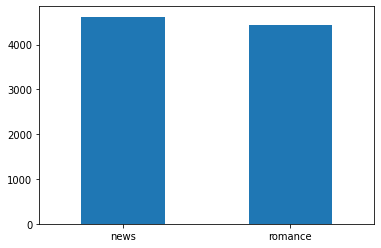

In [ ]:
fig, ax = plt.subplots()
_ = df['label'].value_counts().plot.bar(ax=ax, rot=0)
fig.savefig("categories_counts.png", bbox_inches = 'tight', pad_inches = 0)

We have slightly more news texts that romance texts, which we should keep in mind as we go ahead with classification.

## Extracting Features

### Defining Features
What should we use as features for the datset? What did we use for the fruit example before?

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/fruit1.png "fruit1")

Now that we are using sentences, how can we best represent each sentence as a series of values?
One idea is to use how many particular parts of speech the sentence contains.

* Nouns: Most basically described as a person, place, or thing. Counting nouns can help determine how many topics are being discussed in a sentence.
* Adjectives: Descriptors of nouns (eg. "yellow", "angry", "charming"). Counting adjectives can help determine how often descriptive words are being added to nouns, which can demonstrate writing style.

### Parts of Speech

Let us first take a look at all of the parts of speech (POS) on each sentence in our dataframe. The sentences are located in the column sentence, and to get the parts of speech, we can use the function pos_tag_sents from the NLTK package. Let's do that and look at the first five results:

In [ ]:
# compute parts of speech on each sentence (row)
nltk.download('averaged_perceptron_tagger')
pos_all = pos_tag_sents(df['sentence'])
print (pos_all[:5])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NameError: ignored

#### What's with those part of speech labels? They aren't helpful at all!

The Penn Tagset, which NLTK uses for it's part of speech tagger, is not particularly intuitive. Fortunately, they provide code that allows you to check what different tags stand for.

In [ ]:
# troubleshooting: https://github.com/nltk/nltk/issues/919
nltk.download('tagsets')
nltk.help.upenn_tagset("NN")
nltk.help.upenn_tagset("JJ")

## Calculating our Features
#### We can run a function that calculates our features across the dataset for us. In this case, numbers of nouns, adjectives, and adverbs that appear in the sentence

Now we know the tags for the different parts of speech we want to count in each sentence. Let's now write a function that will count the parts of speech to us, when given a part of speech tagged sentence (such as we have already in our DataFrame) and the part of speech we want to count (for example, "NN" to count the number of nouns in the sentence).

In [ ]:
def countPOS(pos_tag_sent, POS):
    pos_count = 0
    all_pos_counts = []
    for sentence in pos_tag_sent:
        for word in sentence:
            tag = word[1]
            if tag [:2] == POS:  
                pos_count = pos_count+1
        all_pos_counts.append(pos_count)
        pos_count = 0
    return all_pos_counts

We will now call this function twice, one for each of the parts of speech we are counting. As we finish counting them, we put the results into the DataFrame, saving us the trouble of having to do so late

In [ ]:
df['NN'] = countPOS(pos_all, 'NN')
df['JJ'] = countPOS(pos_all, "JJ")

NameError: ignored

In [ ]:
df.head()

In [ ]:
df.tail()

### So how many POS types do we have for each type of text?

We can use the Pandas groupby function to aggregate our data based on unique values in any column of the data. Here we seperate our data into groups by the label type (news or romance) and then add together each texts count of nouns, adjectives, and adverbs.

In [ ]:
df.groupby('label').sum()

### Save the dataframe to your computer as a csv file (comma separated value)

Pandas provides an easy function to save your DataFrames to your computer as a .csv file, a text file containing all the information separated by commas. The function is called to_csv:

In [ ]:
df.to_csv("df_news_romance.csv", index=False)

## Supervised Machine Learning

Supervised machine learning takes places in two steps: the training phase, and the testing phase. In the training phase, you use a portion of your data to train your algorithm (which, in our case, is a classification algorithm). You provide both your feature vector and your labels to the algorithm, and the algorithm searches for patterns in your data that can help associate it with a particular label.

In the testing phase, we use the classifier we trained in the previous step, and give it previously unseen feature vectors representing unseen data to the algorithm, and have the algorithm predict the label. We can then compare the "true" label to the predicted label, and see if our classifier provides us with a good and generalizable way of accomplishing the task (in our case, the task of automatically distinguishing news sentences from romance sentences).

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/mlsteps.png "mlsteps")

_Source: Andrew Rosenberg_

## QUIZ TIME! What are our Feature Vectors for the Brown Corpus example?

It's important to remember that we cannot use the same data we used to build the classifier to test the data; if we did, our classifier would be 100% correct all of the time! This will not tell us how our trained classifer will perform on new, unseen data. We therefore need to split our data into a train set and a test set.

* We will use the train set data to train our classifier
* We will use the test set data to test our classifier

First, we need to load in the Python libraries that we will be using for our analysis.

In [ ]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Read data in from a spreadsheet
Let's take the data we just saved out and load it back into a dataframe so that we can do some analysis with it!

In [ ]:
df = pd.read_csv("df_news_romance.csv")

### Preparing data for machine learning
We're almost ready to do some machine learning! First, we need to split our data into feature vectors and labels. We need them separated to train the classifier. Remember, the features we are using to train our classifier are numbers of nouns, and adjectives in each sentence. (We are not using the sentences themselves as features!)

In [ ]:
fv = df[["NN", "JJ"]]
fv.head()

,NN,JJ
0,11,2
1,13,2
2,16,2
3,9,3
4,5,3


We have more news sentences than romance sentences; this is not a problem, but it's something to take note of during evaluation.

In [ ]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

### Partitioning data into train and test sets
When you are partitioning your data into train and test sets, a good place to start is to use 75% of your data for training, and 25% of your data for testing. We want as much training data as possible, while also having enough testing data to ensure that our trained classifier is generalizable across a number of examples. This will also lead to more accurate evalutation of our trained classifier.

Fortunately, sklearn has a function that will do exactly this!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                    random_state = 42)

* We use the "stratify" argument because we have an uneven amount of training data; we have more news sentances than romance sentences. By using stratify, we ensure that our classifier will take this data imbalence into account.

* In this example, we are using a fixed random state, to ensure we will always get exactly the same value when we classify. Adding this argument is unnecessary for most types of classification; we do it here to ensure our results do not vary slightly across runs.

## Fun Fact Alert!

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6790, 2)
(2264, 2)


### What classifier do I use?

Choosing a classifier can be a challenging task. However, this flowchart can give you an idea of where to start!


![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/algorithms_cheatsheet.png "algorithms_cheatsheet")

_Source: Andreas Mueller_

## QUIZ TIME! Given what we know about our data and our goals, following the chart above & decide which algorithm we should use. 

Answer: 

#### An animated example of classification
The following animated GIF shows an example of linear classification.

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/croppedml.gif "cropped_ml")

_Source: Andrew Rosenberg_

## Supervised Classification Algorithm with _sklearn_

One of the best things about sklearn is the simplicity of its syntax.

To do machine learning with sklearn, follow these three steps (the function names remain the same, regardless of the classifier you use!):

### Step 1: Import your desired classifier

In [ ]:
from sklearn.svm import LinearSVC

### Step 2: Create an Instance of your machine learning algorithm

In [ ]:
classifier = LinearSVC(max_iter=5000, dual=False)

### Step 3: Fit your data to your classifier (TRAIN)

In [ ]:
classifier.fit(X_train, y_train)

As mentioned above, LinearSVC, is a linear model for classification that separates classes using a line, a plane, or a hyperplane. The classifier.fit method searches for that line, plane, or hyperplane-which is also called the decision boundary. The dark gray line in the figure below is the decision boundary that the LinearSVC classifier found for this set of training data. All the data (dots) to the left of the gray line in the area with the orange background are classified as romance, while all the data to the right in the blue area are classified as news. The leftward skew of the classification space is due to the data being very dense and highly overlapping.

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/training_boundary.png "training_boundary")

### Step 4: Predict Labels for Unseen Data (TEST)

In [ ]:
y_predict = classifier.predict(X_test)

### Step 5: Score!

In [ ]:
classifier.score(X_test, y_test)

Right now, our classifier can correctly predict previously unseen news and data about 71% of the time. We can get more information about how we are doing by creating a confusion matrix. This confusion matrix shows how many times we are predicting categories correctly.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_predict)

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/confusion_matrix.png "confusion_matrix")

In LinearSVC the classifier.predict decides which class a data point is in based on which side of the decision boundary, which is the gray line in the figure, the point falls on. Points in the orange area to the left of the gray line are classified as romance, while points in the blue area to the right of the gray line. Orange points in the blue area are romance texts that are misclassified as news texts, while blue points in the orange area are news texts that are misclassified as romance texts.

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/testing_boundary.png "testing_boundary")

## Unsupervised Machine Learning

In supervised machine learning tasks, the data is assigned to some set of classes. For example, here we are given a dataset wherein each observation is a set of physical attributes of an object. In an supervised task, the object column acts as the labels. The algorithm then uses these existing separations in the data to develop criteria for classifying unknown observations in the data.

In contrast, in an unsupervised machine learning task there either are no labels or that information is just treated as another attribute of the observation. In our fruit example, the object type is now just another characteristic of the observation, and often is altogether unknown:

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/fruit1.png "fruit1")

An unsupervised algorithm is not told how the data is structured or separated (barring parameter tuning); instead the algorithm goes looking for stucture and separation in the data.

Clustering algorithms aim to group the observations in the data into categories (classes) based on some notion of how similar the observations are to each other. For example, given a basket of fruit, a clustering algorithm tries to group what it thinks are apples together into one class, and what it thinks are oranges into another.

Dimension reduction techniques aim to decrease the number of rows and columns in a dataset based on some criteria such as which variables most separate the observations. For example, given the height, width, color, mass, and roundness of the fruit attributes, one dimension reduction algorithm will try to determine the minimum number of attributes needed to tell the fruit apart—can we tell it's an apple with just the mass and color?

Generally speaking, in an unsupervised task there is no existing labeling to compare the results of the algorithm to; instead we often evaluate reliability through repeated experiments, computing the odds of our data being generated by our model, and visualizations.

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/algorithms_cheatsheet.png "algorithms_cheatsheet")

## Topic Modeling with Latent Dirchlet Allocation (LDA)

One subset of unsupervised learning tasks are topic extraction tasks, where the aim is to find common groupings of items across collections of items. One method of doing so is Latent Dirichlet allocation (LDA). Latent Dirichlet Allocation is a way to model how topics are distributed over a corpus and words are distributed over a set of topics.

In broad strokes, LDA extracts hidden (latent) topics via the following steps:1, 2

1. Arbitrarily decide that there are 10 topics.
2. Select one document and randomly assign each word in the document to one of the 10 topics.
3. Repeat step 2 for all the other documents. This results in the same word being assigned to multiple topics.
4. Compute
    * how many topics are in each document?
    * how many topic assignements are due to a given word?
5. Take one word in one document and reassign it to a new topic and then repeat step 4.
6. Repeat step 5 until the model stabilizes such that reassigned topics do not change distributions.

LDA yields a set of words associated to each topic (see step 4, part 2) and the mixture of topics associated to each document (see step 4, part 1).

# Let's do topic modeling with sklearn!

One of the best things about sklearn is the simplicity of its syntax.

To do machine learning with sklearn, follow these five steps (the function names remain the same, regardless of the algorithm you use!):

### Step 1: Import your desired algorithm

In this example, we will be using the Latent Dirichlet Allocation algorithm.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

### Step 2: Latent Dirichlet Allocation (LDA)

When creating an instance of sklearn's _Latent Dirichlet Allocation_ algorithm to run on our data, we need to set parameters. n_components is the number of topics in the dataset and we set random_state to 42 so that this notebook is reproducible. Since the sentences happen to already have labels (either news or romance), lets see if LDA can also find those separations by setting the number of topics to 2.

In [ ]:
num_topics = 2
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

### Step 3: Fit your data

Using the lda object we set up above, we now apply (fit) the LDA algorithm to the bag of words we extracted from our sentences and had stored in the tf sparse matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf = tf_vectorizer.fit_transform(df['sentence'])

In [ ]:
lda.fit(tf)

### Step 4: Transform your data

We now want to model the documents in our corpus in terms of the topics discovered by the model. This is done using the .transform method of LDA. This function yields the distribution of topics across the documents. The document_topic array contains the percentages of each topic found in each document.

In [ ]:
document_topic = lda.transform(tf)

Then we visualize how much of each document is each topic - for example that document 1 is 10% topic A and 25% topic b. We choose an area chart because each band of the chart maps to a different category (in this case a unique topic). The width of each band in relation to the others illustrates how much of the document is thought to be about that topic relative to the others.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

colors = ['tab:green', 'tab:pink']
topics = np.arange(10)
num_docs = document_topic.shape[0]

fig, ax = plt.subplots(figsize=(15,5))
_ = ax.stackplot(range(num_docs), document_topic.T, labels=topics, colors=colors)
_ = ax.set_xlim(0, num_docs)
_ = ax.set_ylim(0,1)
_ = ax.set_yticks([])
_ = ax.set_xlabel("document")
_ = ax.legend(title="topic", bbox_to_anchor=(1.06, 1), borderaxespad=0)
fig.savefig("images/doc_topic.png", bbox_inches = 'tight', pad_inches = 0)

### Step 5: Print topics

lda.components_ is an array where each row is a topic, and each column roughly contains the number of times that word was assigned to that topic, which is also the probability of that word being in that topic. To figure out which word is in which column, we use the get_feature_names() function from CountVectorizer. The argsort function is used to return the indexes of the columns with the highest probabilities, which we then map into our collection of words. Here we print the top 5 words in each topic.

In [ ]:
num_words = 10
topic_word  = lda.components_ 
words = np.array(tf_vectorizer.get_feature_names())
for i, topic in enumerate(topic_word):
    # sorting is in descending, so ::-1 reverses to ascending
    sorted_idx = topic.argsort()[::-1]
    print(i, words[sorted_idx][:num_words])

We can also visualize these topics as lists sized by the frequency of the word and colored by the topic, as proposed by _Allan Riddell_ in [Text Analysis with Topic Models for the Humanities and Social Sciences](https://liferay.de.dariah.eu/tatom/index.html):

In [ ]:
# font size for word with largest share in corpus
fontsize_base = 40/ np.max(topic_word)

fig, ax = plt.subplots(figsize=(15, 2), constrained_layout=True)

for i, topic in enumerate(topic_word):
    top_idx = topic.argsort()[::-1][:num_words]
    top_words = words[top_idx]
    top_share = topic[top_idx]
    for j, (word, share) in enumerate(zip(top_words, top_share)):
        ax.text(j, i/4,  word, fontsize=fontsize_base*share, color=colors[i])
        
#stretch the-axis to accommodate the words
ax.set_xlim(0, num_words)
ax.set_ylim(-.2, i/4+.2)
ax.axis('off')
#fig.subplots_adjust(hspace=-0)
fig.savefig("images/word_topic.png", bbox_inches = 'tight', pad_inches = 0)

### Step 6: Score!

One method of evaluating a model is to compute the chance (probability) of the data we observed showing up in a dataset generated by the model. First we start with the modeled probability density function, which is the theoretical distribution of all topics in our model. We then use the log likelihood and the perplexity functions to evaluate the average odds of our observations occuring in the modeled distribution of words and topics.

![alt text](https://raw.githubusercontent.com/ErinEMcC/Louisville_ML/master/images/xkcd_False.png "xkcd_False")

In [ ]:
print(f'Approximate Log Likelihood: {lda.score(tf)}')
print(f'Perplexity: {lda.perplexity(tf)}')

### Step 7: Add Supervision: Compare Topics to Labels

We can compare the results of our topic modeling to the labels we already have for the data. First we need to assign a label to each document based on which topic is most prevalant, which we can do using the argmax function since it returns the index (which maps directly to the topic) of the cell with the highest value. We then compare these topic based classes to the labels in our dataset. Given the sentences for each topic, we will make the assumption that topic 0 is news and topic 1 is romance. We canargmax returns the index of the

In [ ]:
# get the location of the highest value in each column
topic_class = document_topic.argmax(axis=1)
topic_labels = np.empty(topic_class.shape, dtype=object)
topic_labels[topic_class==0] = 'news'
topic_labels[topic_class==1] = 'romance'
topic_labels

We can now use a confusion matrix to see if there is overlap between the topics and the labels. In a confusion matrix, the data is the counts of true positive, false positive, false negative, and true negative labeing. The confusion matrix can be visualized as a table:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['label'], topic_labels)

#### Unfortunately
LDA doesn't seem to work all that well for this dataset. And nothing about the topics indicates a distinction between the romance and news texts... but we already saw that they didn't seem to be all that separable. Can we get better results by expanding the corpus to include more texts of other types? Or by expanding each document so that it is longer than a sentence?

Since topic modeling works better with longer texts, what topics might you get if you try to model: Moby Dick, Pride & Prejudice, Both together, some contemporary title?

# Review

At the end of this workshop, we have covered the following skills:
* How to use skills from the NLTK workshop to build features for a classification task
* How to build a text classification system that can predict whether sentences belong to one category ("news") or another ("romance")
* How to group data and perform calculations on the aggregations
* How to prepare data for machine learning using pandas, a package for Python that helps to organize your data
* How to use the scikit-learn package for Python to perform different types of machine learning on the data
* How to evaluate the results of machine learning algorithms
* How to visualize observations, aggregations, and algorithmic results

## Resources
"Introduction to Machine Learning with Python", Andreas C. Muller and Sarah Guido. O'Reilly, 2017.

"LING 83800: Methods in Computational Linguistics II", Andrew Rosenberg. http://eniac.cs.qc.cuny.edu/andrew/methods2/, 2014.

"Introduction to Latent Dirichlet Allocation", Edward Chen, http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/, 08/22/2011

"Topic Modeling for Humanists: A Guided Tour", Scott Weingart, http://www.scottbot.net/HIAL/index.html@p=19113.html, 07/25/2012

"The LDA Buffet is Now Open", Matthew Jockers, http://www.matthewjockers.net/2011/09/29/the-lda-buffet-is-now-open-or-latent-dirichlet-allocation-for-english-majors/, 09/29/2011

"Introduction to Topic Modeling",Christine Doig, http://chdoig.github.io/pytexas2015-topic-modeling/#/, PyTexas, 2015

##### Acknowledgments
Shout out to the CUNY DHRI for providing much of this workshop's structure.
